<a href="https://colab.research.google.com/github/HelloMina001/AI_Course2022/blob/main/task_0622.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

download dataset:https://www.kaggle.com/datasets/brendan45774/test-file?resource=download


There are many things for a greater chance to survive<br>
age<br>
PClass<br>

In [69]:
# ｖｅｒｓｉｏｎ２　
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

path_1='/content/train.csv'
path_2='/content/test.csv'
path_3='/content/gender_submission.csv'
df_train = pd.read_csv(path_1)
df_test = pd.read_csv(path_2)
df_gender = pd.read_csv(path_3)
df_train.head()
df_test.head()
df_gender.head()

print ('train',len(df_train)) #891
print ('test',len(df_test))  #418
print ('gender',len(df_gender)) #418

print('Train columns:', df_train.columns.tolist())
print('Test columns:', df_test.columns.tolist())
print('gender columns:', df_gender.columns.tolist())


df_test_1=df_test.merge(df_gender, left_on='PassengerId', right_on='PassengerId')
print(len(df_test_1))

print('df_test_1:', df_test_1.columns.tolist())

train 891
test 418
gender 418
Train columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Test columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
gender columns: ['PassengerId', 'Survived']
418
df_test_1: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']


In [73]:

#age 
print('CountNaN_age:',df_train["Age"].isna().sum() ) #177

age_median = np.nanmedian(df_train["Age"])
new_Age = np.where(df_train["Age"].isnull(), age_median, df_train["Age"])
df_train["Age"] = new_Age
print('CountNaN_age:',df_train["Age"].isna().sum() )  #0


CountNaN_age: 0
CountNaN_age: 0


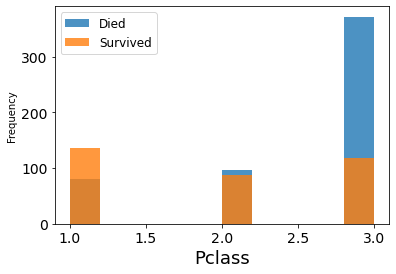

In [110]:
#pclass
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

plt.figure()
fig = df_train.groupby('Survived')['Pclass'].plot.hist(histtype= 'bar', alpha = 0.8)
plt.legend(('Died','Survived'), fontsize = 12)
plt.xlabel('Pclass', fontsize = 18)
plt.show()



In [83]:

# 建立 train_X
train_X = pd.DataFrame([df_train["Pclass"],df_train["Age"]]).T
df_test_2=df_test_1[["Pclass","Age",'Survived']]
df_test_3=df_test_1[["Pclass","Age"]]

# 建立模型
print(len(train_X)) #891
print(len(df_train["Survived"])) #891

logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(train_X, df_train["Survived"])


print(train_X.columns.tolist())
print(df_test_3.columns.tolist())
print(train_X.shape)
print(df_test_3.shape)

891
891
['Pclass', 'Age']
['Pclass', 'Age']
(891, 2)
(418, 2)


In [109]:
df_test_4 = df_test_3.dropna()
to_be_predicted = df_test_4
df_test_5=df_test_2.dropna()
print(len(df_test_5))  #322

df_test_6=df_test_5[["Pclass","Age"]]
df_test_6

to_be_predicted=df_test_6
predicted_sales = logistic_regr.predict(to_be_predicted)
print(predicted_sales[0])
print(df_test_5.head())


332
0
   Pclass   Age  Survived
0       3  34.5         0
1       3  47.0         1
2       2  62.0         0
3       3  27.0         0
4       3  22.0         1
